In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [12]:
df2 = pd.read_csv("Mera_CleanData.csv")
print("Dataset Description")
print(df2.info())

Dataset Description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         16441 non-null  object 
 1   max_temp                     16441 non-null  float64
 2   min_temp                     16441 non-null  float64
 3   igmin                        16441 non-null  int64  
 4   min_grass                    16436 non-null  float64
 5   rain                         16441 non-null  float64
 6   pressure_cbl                 16441 non-null  float64
 7   wind_speed                   16441 non-null  float64
 8   max_10minute_wind            16441 non-null  float64
 9   dir_10minute_wind            16441 non-null  float64
 10  max_gust                     16441 non-null  float64
 11  sun                          16441 non-null  float64
 12  dos                          16437 non-null  float64
 

In [17]:
# Select all numeric columns
df2_num = df2.select_dtypes(include=['number'])

# Display the numeric columns
print(df2_num.head())

# Get the list of numeric column names
numeric_column_names = df2_num.columns.tolist()
print("Numeric columns:", numeric_column_names)

   max_temp  min_temp  igmin  min_grass  rain  pressure_cbl  wind_speed  \
0     -0.27     -0.36      1      -1.18   0.9         997.9       -0.31   
1     -0.48     -0.48      0      -0.29   0.7         998.8       -0.45   
2      0.48      0.60      0       0.62   4.8         990.8        0.92   
3     -0.15      0.22      0       0.21   0.5         990.0        0.74   
4     -0.40     -0.14      0      -0.04   0.0        1001.6        0.51   

   max_10minute_wind  dir_10minute_wind  max_gust  ...  Longitude  year  \
0              -0.26               0.89     -0.40  ...      -6.24  1979   
1              -0.88               0.42     -0.91  ...      -6.24  1979   
2               0.96               0.07      1.05  ...      -6.24  1979   
3               0.96               0.54      1.15  ...      -6.24  1979   
4               0.20               0.42      0.12  ...      -6.24  1979   

   month  day  temp_range  smd_combined  extreme_rain  heatwave  high_wind  \
0     10   28       

In [34]:
from sklearn.impute import SimpleImputer

# Ensure 'extreme_weather' exists in df2_num
if 'extreme_weather' not in df2_num.columns:
    raise ValueError("Column 'extreme_weather' does not exist in the dataset.")

# Split the data into features and target
X = df2_num.drop('extreme_weather', axis=1)
y = df2_num['extreme_weather']

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Splitting the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into validation and test (15% each)

# Print shapes of the splits
print(f"Training Set Shape: {X_train.shape}")
print(f"Validation Set Shape: {X_val.shape}")
print(f"Test Set Shape: {X_test.shape}")

# Classifier: Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions on validation and test sets
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)

# Model evaluation for validation set
print("\nValidation Set Evaluation:")
print('Accuracy:', accuracy_score(y_val, y_val_pred))
print('Classification Report:\n', classification_report(y_val, y_val_pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, y_val_pred))

# Model evaluation for test set
print("\nTest Set Evaluation:")
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Classification Report:\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))


Training Set Shape: (11508, 28)
Validation Set Shape: (2466, 28)
Test Set Shape: (2467, 28)

Validation Set Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1800
           1       1.00      1.00      1.00       666

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466

Confusion Matrix:
 [[1800    0]
 [   0  666]]

Test Set Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1833
           1       1.00      1.00      1.00       634

    accuracy                           1.00      2467
   macro avg       1.00      1.00      1.00      2467
weighted avg       1.00      1.00      1.00      2467

Confusion Matrix:
 [[1833    0]
 [   0  634]]


In [35]:
# Inspect correlations
correlations = X.corrwith(y).sort_values(ascending=False)
print("Top Feature Correlations with Target:\n", correlations.head(10))

# Check for duplicates
duplicates = df2_num.duplicated().sum()
print(f"Total Duplicates in Dataset: {duplicates}")

# Check for overlap between splits
train_indices = set(X_train.index)
val_indices = set(X_val.index)
test_indices = set(X_test.index)

print(f"Train-Val Overlap: {len(train_indices.intersection(val_indices))}")
print(f"Train-Test Overlap: {len(train_indices.intersection(test_indices))}")
print(f"Val-Test Overlap: {len(val_indices.intersection(test_indices))}")


Top Feature Correlations with Target:
 extreme_rain         0.993179
rain                 0.908949
max_gust             0.306128
max_10minute_wind    0.289071
wind_speed           0.203971
min_grass            0.107719
min_temp             0.067324
heatwave             0.065249
month                0.026019
dos                  0.022186
dtype: float64
Total Duplicates in Dataset: 0
Train-Val Overlap: 0
Train-Test Overlap: 0
Val-Test Overlap: 0


In [37]:
# Drop the highly correlated feature 'rain'
X = X.drop(columns=["extreme_rain"], errors="ignore")

# Re-split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Handle class imbalance with SMOTE (optional)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on validation set
y_val_pred = clf.predict(X_val)
print("\nValidation Set Evaluation:")
print('Accuracy:', accuracy_score(y_val, y_val_pred))
print('Classification Report:\n', classification_report(y_val, y_val_pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = clf.predict(X_test)
print("\nTest Set Evaluation:")
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Classification Report:\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))


Validation Set Evaluation:
Accuracy: 0.8653690186536902
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1800
           1       0.78      0.70      0.74       666

    accuracy                           0.87      2466
   macro avg       0.84      0.81      0.82      2466
weighted avg       0.86      0.87      0.86      2466

Confusion Matrix:
 [[1665  135]
 [ 197  469]]

Test Set Evaluation:
Accuracy: 0.8848804215646534
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1833
           1       0.81      0.73      0.76       634

    accuracy                           0.88      2467
   macro avg       0.86      0.83      0.84      2467
weighted avg       0.88      0.88      0.88      2467

Confusion Matrix:
 [[1723  110]
 [ 174  460]]


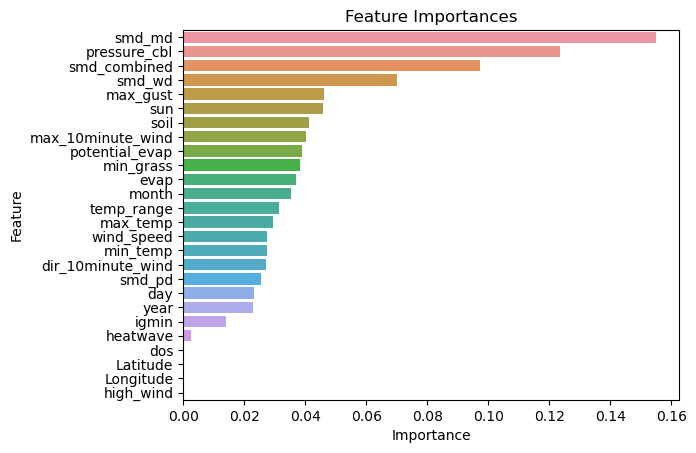

In [38]:
# Get feature importances from the trained Random Forest model
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Visualize feature importances
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importances")
plt.show()


In [39]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.0s
[CV] END max_depth=10, min_sa

In [40]:
from sklearn.model_selection import cross_val_score

# Cross-validation on training set
cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.88633721 0.89418605 0.94215116 0.93604651 0.94156977]
Mean CV Accuracy: 0.9200581395348838


In [41]:
#Compare Models 
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_resampled, y_train_resampled)

# Evaluate Logistic Regression
y_log_pred = log_model.predict(X_val)
print("\nLogistic Regression Validation Accuracy:", accuracy_score(y_val, y_log_pred))



Logistic Regression Validation Accuracy: 0.8369829683698297


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


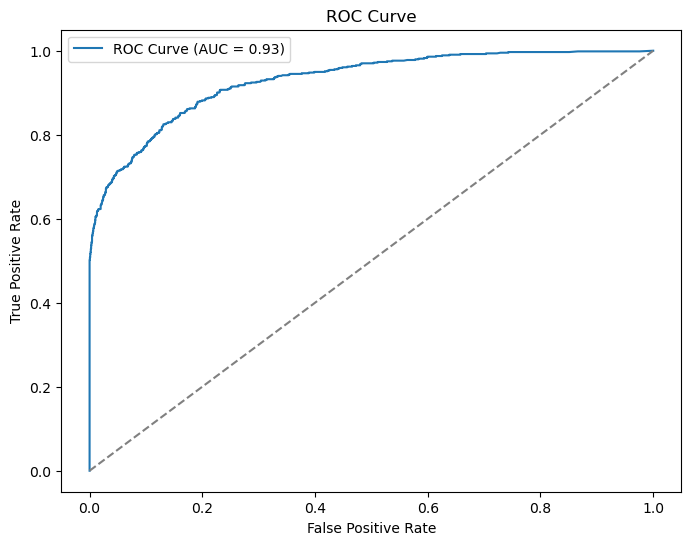

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute ROC-AUC for test set
y_test_probs = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_probs)
fpr, tpr, _ = roc_curve(y_test, y_test_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


K-Means Clustering

In [43]:
from sklearn.preprocessing import StandardScaler

# Exclude the target variable
X_clustering = X.copy()  # Assuming X is already prepared for modeling

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

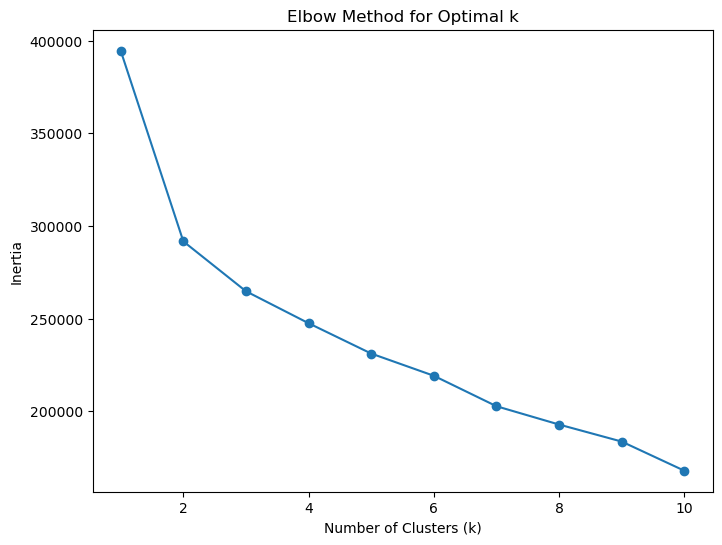

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute inertia for a range of cluster numbers
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

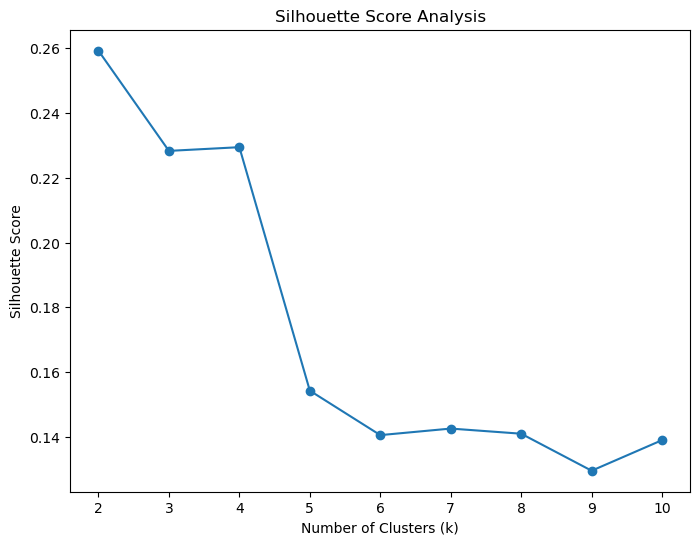

In [45]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for different k
silhouette_scores = []
for k in range(2, 11):  # Silhouette is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()


In [46]:
# Choose optimal k (replace with your choice based on the above analysis)
optimal_k = 3

# Fit K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
X_clustering['Cluster'] = kmeans.labels_


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


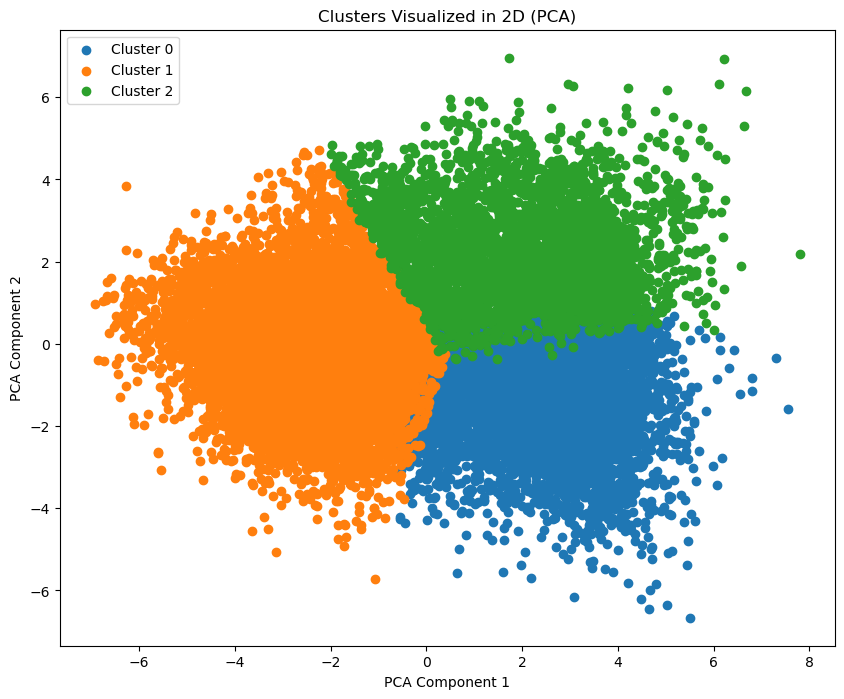

In [47]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    plt.scatter(X_pca[kmeans.labels_ == cluster, 0], X_pca[kmeans.labels_ == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualized in 2D (PCA)')
plt.legend()
plt.show()


In [50]:
X_clustering.columns

Index(['max_temp', 'min_temp', 'igmin', 'min_grass', 'pressure_cbl',
       'wind_speed', 'max_10minute_wind', 'dir_10minute_wind', 'max_gust',
       'sun', 'dos', 'soil', 'potential_evap', 'evap', 'smd_wd', 'smd_md',
       'smd_pd', 'Latitude', 'Longitude', 'year', 'month', 'day', 'temp_range',
       'smd_combined', 'heatwave', 'high_wind', 'Cluster'],
      dtype='object')

In [51]:
# Centroids in original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=X_clustering.drop('Cluster',axis=1).columns)

print("Cluster Centroids:")
print(centroid_df)


Cluster Centroids:
   max_temp  min_temp     igmin  min_grass  pressure_cbl  wind_speed  \
0 -0.452835 -0.158772  0.133294  -0.059080    995.130393    0.769331   
1  0.770385  0.637038  0.038382   0.588067   1005.787081   -0.267693   
2 -1.015943 -1.138131  0.791655  -1.171603   1008.623223   -0.492325   

   max_10minute_wind  dir_10minute_wind  max_gust       sun  ...    smd_pd  \
0           0.803043           0.124102  0.820886  2.239054  ... -2.992233   
1          -0.282846          -0.035693 -0.288165  5.315237  ...  4.980802   
2          -0.506646          -0.095852 -0.520253  3.532830  ... -1.518803   

   Latitude  Longitude         year     month        day  temp_range  \
0     53.43      -6.24  2001.708582  6.812078  15.730036    5.715455   
1     53.43      -6.24  2001.927872  6.817491  15.781813    8.181607   
2     53.43      -6.24  2001.777656  5.498490  15.635740    7.301400   

   smd_combined  heatwave  high_wind  
0     -0.822628  0.997219   1.000000  
1      5.375

In [52]:
# Combine cluster labels with the original target
X_clustering['extreme_rain'] = y.values
cluster_target_summary = X_clustering.groupby('Cluster')['extreme_rain'].mean()

print("Cluster vs Extreme Rain Probability:")
print(cluster_target_summary)


Cluster vs Extreme Rain Probability:
Cluster
0    0.471466
1    0.188538
2    0.102276
Name: extreme_rain, dtype: float64
